#Testing For Traget1: **Livello_Acqua**

## Set UP

In [1]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 22.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import matplotlib as mpl
import math
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMAResults
from google.colab import drive
from xgboost import XGBRegressor
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
from xgboost import XGBRegressor
#import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMAResults

##1) Testing of Sarimax

In [ ]:
model = ARIMAResults.load('/content/gdrive/MyDrive/Progetto_industry/Models/model_arima.pkl')

In [ ]:
sar_train_data = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/train_sarima.csv')
sar_test_data = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_sarima.csv')
sar_test_data['Data'] = pd.to_datetime(sar_test_data['Data'], format="%Y-%m-%d")
sar_test_data.set_index('Data', inplace=True)
sar_train_data['Data'] = pd.to_datetime(sar_train_data['Data'], format="%Y-%m-%d")
sar_train_data.set_index('Data', inplace=True)

In [ ]:
Yt=pd.concat([sar_train_data,sar_test_data])

In [ ]:
perf=[]
test = pd.DataFrame()
pred = pd.DataFrame()
predictions = list()
for t in range(len(sar_test_data)-7):
    model = SARIMAX(sar_train_data, 
                       order=(2, 1, 3),
                       seasonal_order=(0, 0, 1, 24),
                       enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    output = model_fit.forecast(7)
    yhat = pd.DataFrame(output)
    true_val = sar_test_data.iloc[[t+6]]
    obs = sar_test_data.iloc[[t]]
    sar_train_data=pd.concat([sar_train_data,obs],axis=0)
    test = pd.concat([test,true_val])
    pred = pd.concat([pred,yhat.iloc[[-1]]])

In [ ]:
test['prediction'] = pred.values

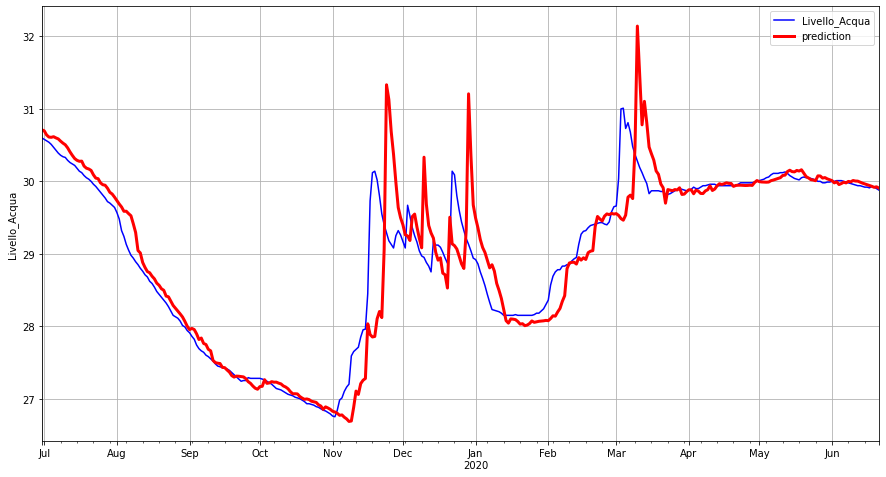

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Livello_Acqua'
xlabel='' 
ax = test['Livello_Acqua'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error(test['Livello_Acqua'],test['prediction'])

0.22217920046297948

## 2) Testing of XGBoost

In [ ]:
xgb_test_data = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_SL.csv').drop('Unnamed: 0', axis=1)
xgb_test_data['Data'] = pd.to_datetime(xgb_test_data['Data'], format="%Y-%m-%d")
xgb_test_data.set_index('Data', inplace=True)
X_test_final = xgb_test_data.drop(['Target'],axis=1)
y_test_final = xgb_test_data['Target']

In [ ]:
xgb = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/XGB_model_LA.sav', 'rb'))

In [ ]:
prediction = xgb.predict(X_test_final)

In [ ]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

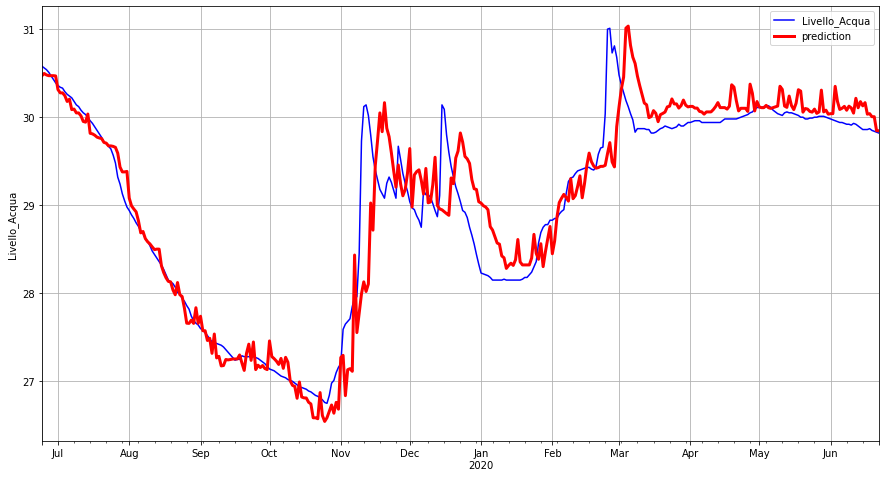

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Livello_Acqua'
xlabel='' 
y_test_final.columns = ['Livello_Acqua', 'prediction']
ax = y_test_final['Livello_Acqua'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( prediction,y_test_final.Livello_Acqua)

0.15733715519171507

## 4) Testing of Random Forest

In [ ]:
rf_test_data = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_SL.csv').drop('Unnamed: 0', axis=1)
rf_test_data['Data'] = pd.to_datetime(rf_test_data['Data'], format="%Y-%m-%d")
rf_test_data.set_index('Data', inplace=True)
X_test = rf_test_data.drop(['Target'],axis=1)
y_test = rf_test_data['Target']

In [ ]:
rf = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/RF_model_LA.sav', 'rb'))

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['prediction'] = prediction

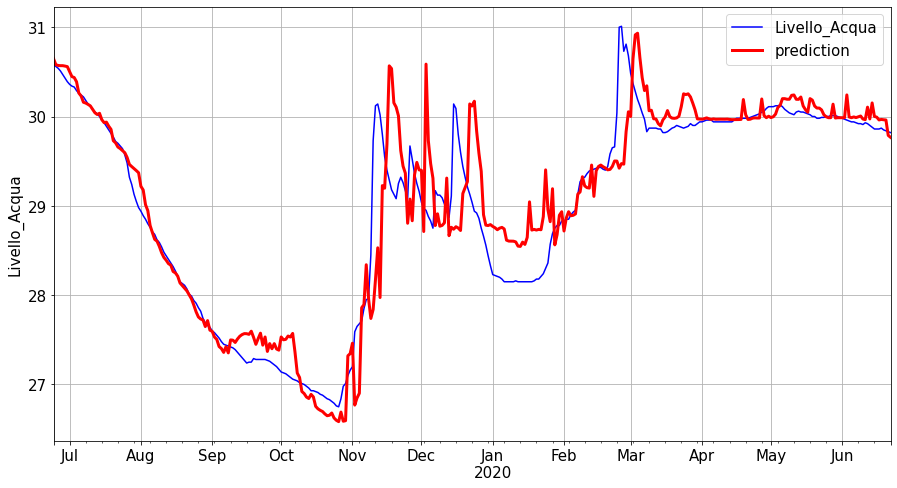

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Livello_Acqua'
xlabel='' 
y_test.columns = ['Livello_Acqua', 'prediction']
ax = y_test['Livello_Acqua'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( y_test.Livello_Acqua,prediction)

0.18100067543835732

## 5) Testing of Random Forest con Feature Selection

In [ ]:
X_test = rf_test_data[[ 'Temperatura_Zona_5', 'Portata_Uscita','month','Livello_Acqua_lag0']]
y_test = rf_test_data['Target']

In [ ]:
rf = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/RF_model_LA_featsel.sav', 'rb'))

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['prediction'] = prediction

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


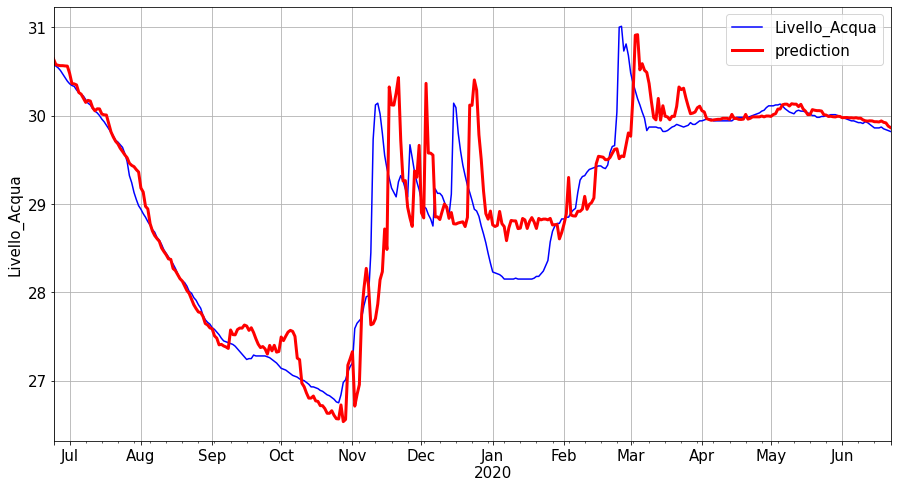

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Livello_Acqua'
xlabel='' 
y_test.columns = ['Livello_Acqua', 'prediction']
ax = y_test['Livello_Acqua'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( y_test.Livello_Acqua,prediction)

0.21504607969862907

## Best Model Analysis

In [ ]:
xgb.importance_type

'gain'

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 31.6 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(xgb )
shap_values = explainer.shap_values(X_test_final)

In [ ]:
X_test_final.columns

Index(['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5', 'Portata_Uscita', 'autumn',
       'spring', 'summer', 'winter', 'month', 'year', 'Pioggia_mediana',
       'Pioggia_std', 'Livello_Acqua_lag0', 'Livello_Acqua_lag1',
       'Livello_Acqua_lag2', 'Livello_Acqua_lag3', 'Livello_Acqua_lag4',
       'Livello_Acqua_lag5', 'Livello_Acqua_lag6', 'Livello_Acqua_mediana',
       'Livello_Acqua_std'],
      dtype='object')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


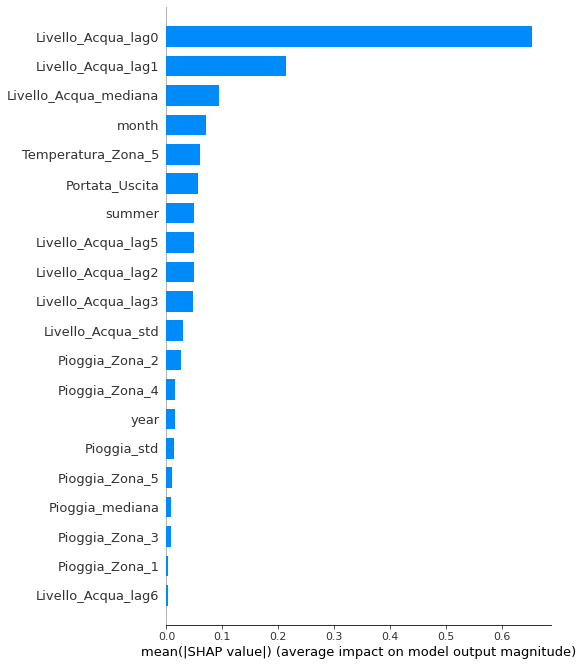

In [ ]:
shap.summary_plot(shap_values, X_test_final, plot_type="bar" )

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


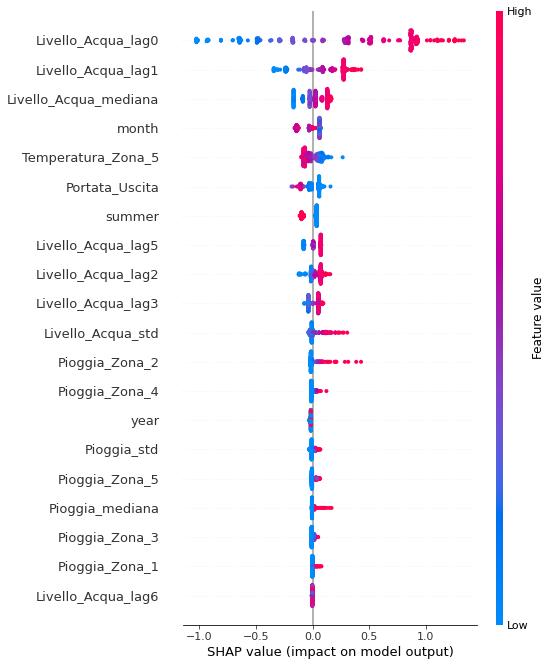

In [ ]:
shap.summary_plot(shap_values, X_test_final)

# Testing For Traget2: Portata_Uscita

##1) Testing of Sarimax

In [4]:
model = ARIMAResults.load('/content/gdrive/MyDrive/Progetto_industry/Models/model_arima_PU.pkl')

In [5]:
train_PU_SA = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/train_PU_SA.csv')
test_PU_SA = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_PU_SA.csv')
train_PU_SA['Data'] = pd.to_datetime(train_PU_SA['Data'], format="%Y-%m-%d")
train_PU_SA.set_index('Data', inplace=True)
test_PU_SA['Data'] = pd.to_datetime(test_PU_SA['Data'], format="%Y-%m-%d")
test_PU_SA.set_index('Data', inplace=True)

In [6]:
Yt=pd.concat([train_PU_SA,test_PU_SA])

In [7]:
perf=[]
test = pd.DataFrame()
pred = pd.DataFrame()
predictions = list()
for t in range(len(test_PU_SA)-7):
    model = SARIMAX(train_PU_SA, 
                       order=(2, 0, 2),
                       seasonal_order=(0, 0, 0, 12),
                       enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    output = model_fit.forecast(7)
    yhat = pd.DataFrame(output)
    true_val = test_PU_SA.iloc[[t+6]]
    obs = test_PU_SA.iloc[[t]]
    train_PU_SA=pd.concat([train_PU_SA,obs],axis=0)
    test = pd.concat([test,true_val])
    pred = pd.concat([pred,yhat.iloc[[-1]]])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [8]:
test['prediction'] = pred.values

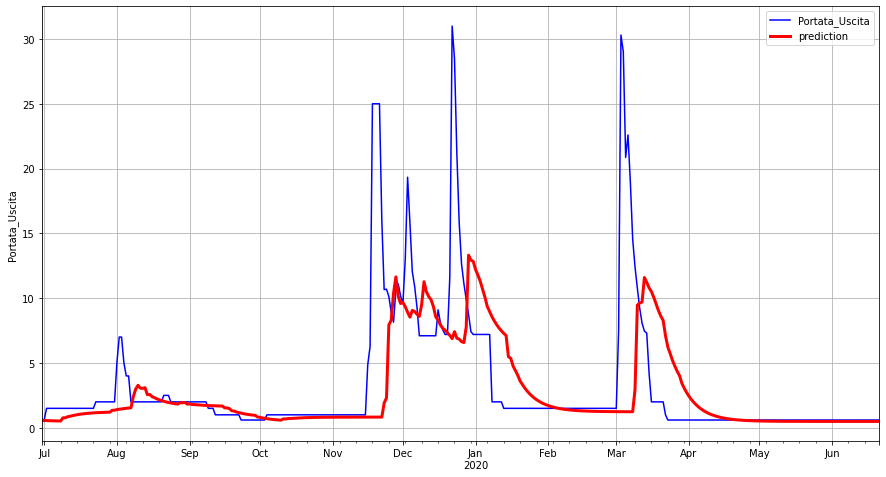

In [9]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
ax = test['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [10]:
mean_squared_error(test['Portata_Uscita'],test['prediction'])

24.33423598965889

## 2) Testing of XGBoost (Tentativo 1)

In [ ]:
test_PU_SL = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_PU_SL_T1.csv').drop('Unnamed: 0', axis=1)
test_PU_SL['Data'] = pd.to_datetime(test_PU_SL['Data'], format="%Y-%m-%d")
test_PU_SL.set_index('Data', inplace=True)
X_test_final = test_PU_SL.drop(['Target'],axis=1)
y_test_final = test_PU_SL['Target']

In [ ]:
xgb = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/XGB_model_PU_T1.sav', 'rb'))

In [ ]:
prediction = xgb.predict(X_test_final)

In [ ]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

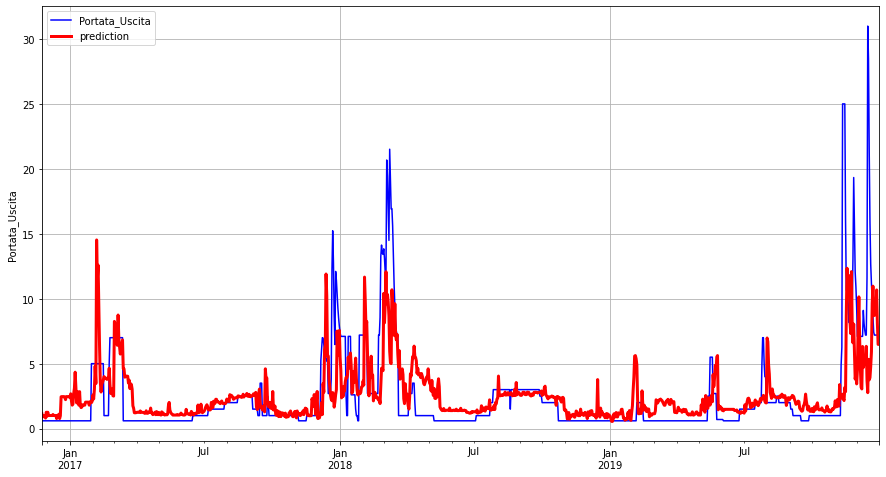

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test_final.columns = ['Portata_Uscita', 'prediction']
ax = y_test_final['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error(prediction,y_test_final.Portata_Uscita)

8.149982792476678

## 3) Testing of XGBoost con Feature Selection (Tentativo 1)

In [ ]:
X_test_final = test_PU_SL[['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_4', 'Pioggia_Zona_5',
       'Temperatura_Zona_5', 'Livello_Acqua', 'summer', 'year', 'month',
       'day_in_year', 'week_in_year', 'Temperatura_Trend',
       'Temperatura_Season', 'Temperatura_Resid', 'Pioggia_Zona_1_diff_1',
       'Pioggia_Zona_2_diff_1', 'Pioggia_Zona_3_diff_1',
       'Pioggia_Zona_5_diff_1', 'Livello_Acqua_diff_1',
       'Portata_Uscita_diff_1', 'Livello_Acqua_diff_2',
       'Portata_Uscita_diff_2', 'Pioggia_Zona_3_diff_3',
       'Livello_Acqua_diff_3', 'Portata_Uscita_diff_3',
       'Pioggia_Zona_1_diff_4', 'Pioggia_Zona_2_diff_4',
       'Pioggia_Zona_3_diff_4', 'Pioggia_Zona_5_diff_4',
       'Livello_Acqua_diff_4', 'Portata_Uscita_diff_4',
       'Pioggia_Zona_2_diff_5', 'Pioggia_Zona_3_diff_5',
       'Pioggia_Zona_4_diff_5', 'Pioggia_Zona_5_diff_5',
       'Livello_Acqua_diff_5', 'Portata_Uscita_diff_5',
       'Pioggia_Zona_2_diff_6', 'Pioggia_Zona_3_diff_6',
       'Pioggia_Zona_4_diff_6', 'Pioggia_Zona_5_diff_6',
       'Livello_Acqua_diff_6', 'Portata_Uscita_diff_6',
       'Temperatura_Trend_shifted', 'Temperatura_Season_shifted',
       'Temperatura_Resid_shifted', 'Livello_Acqua_shifted',
       'Portata_Uscita_shifted']]

y_test_final = test_PU_SL['Target']

In [ ]:
xgb = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/XGB_model_featsel_PU_T1.sav', 'rb'))

In [ ]:
prediction = xgb.predict(X_test_final)

In [ ]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

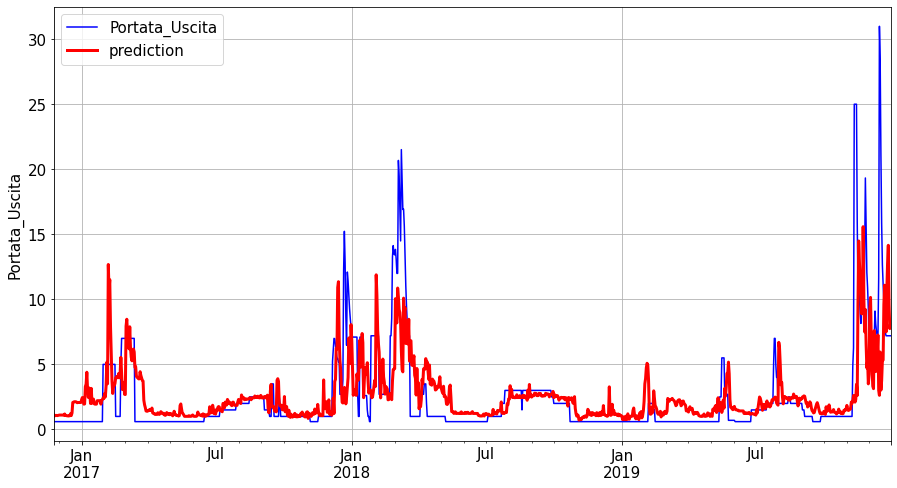

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test_final.columns = ['Portata_Uscita', 'prediction']
ax = y_test_final['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( prediction,y_test_final.Portata_Uscita)

8.104470540452253

## 4) Testing of Random Forest (Tentativo 1)

In [ ]:
test_PU_SL = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_PU_SL_T1.csv').drop('Unnamed: 0', axis=1)
test_PU_SL['Data'] = pd.to_datetime(test_PU_SL['Data'], format="%Y-%m-%d")
test_PU_SL.set_index('Data', inplace=True)
X_test = test_PU_SL.drop(['Target'],axis=1)
y_test = test_PU_SL['Target']

In [ ]:
rf = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/RF_model_PU_T1.sav', 'rb'))

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['prediction'] = prediction

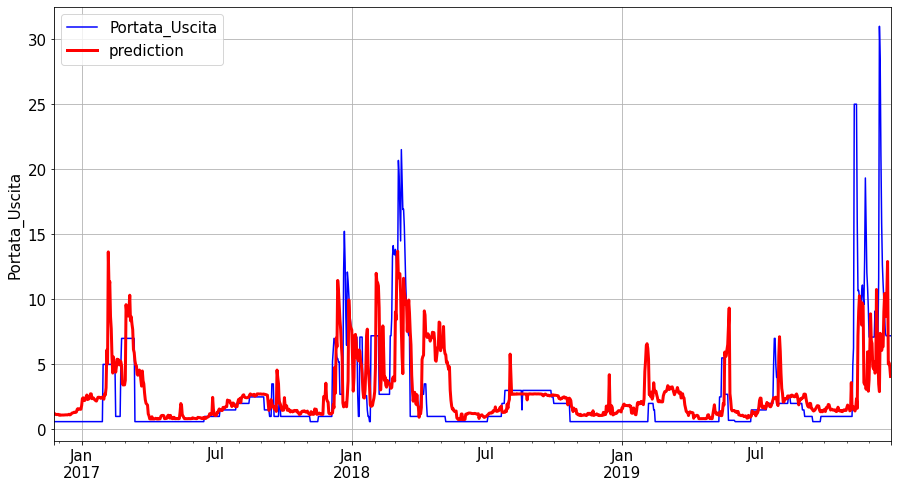

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test.columns = ['Portata_Uscita', 'prediction']
ax = y_test['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( y_test.Portata_Uscita,prediction)

9.372306208672088

## 5) Testing of Random Forest con Feature Selection (Tentativo 1)

In [ ]:
X_test = test_PU_SL[['Livello_Acqua', 'day_in_year', 'Temperatura_Trend',
       'Portata_Uscita_diff_6', 'Temperatura_Season_shifted',
       'Livello_Acqua_shifted']]
y_test = test_PU_SL['Target']

In [ ]:
rf = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/RF_model_featsel_PU_T1.sav', 'rb'))

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['prediction'] = prediction

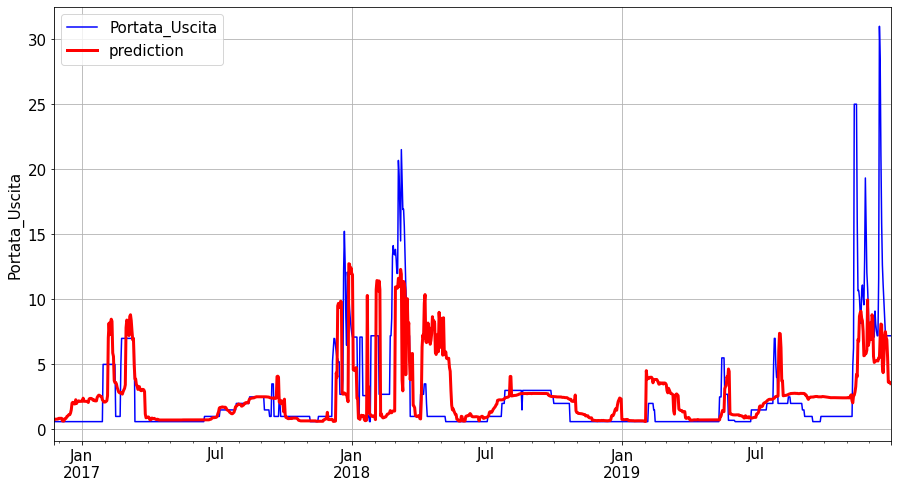

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test.columns = ['Portata_Uscita', 'prediction']
ax = y_test['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( y_test.Portata_Uscita,prediction)

9.092036070163886

## 6) Testing of XGBoost (Tentativo 2)

In [ ]:
test_PU_SL = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_PU_SL_T2.csv')
test_PU_SL['Data'] = pd.to_datetime(test_PU_SL['Data'], format="%Y-%m-%d")
test_PU_SL.set_index('Data', inplace=True)
X_test_final = test_PU_SL.drop(['Target'],axis=1)
y_test_final = test_PU_SL['Target']

In [ ]:
xgb = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/XGB_model_PU_T2.sav', 'rb'))

In [ ]:
prediction = xgb.predict(X_test_final)

In [ ]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

In [ ]:
y_test_final['Target'] = (np.exp(y_test_final.Target-1)-1)
y_test_final['prediction'] = (np.exp(y_test_final.prediction-1)-1)

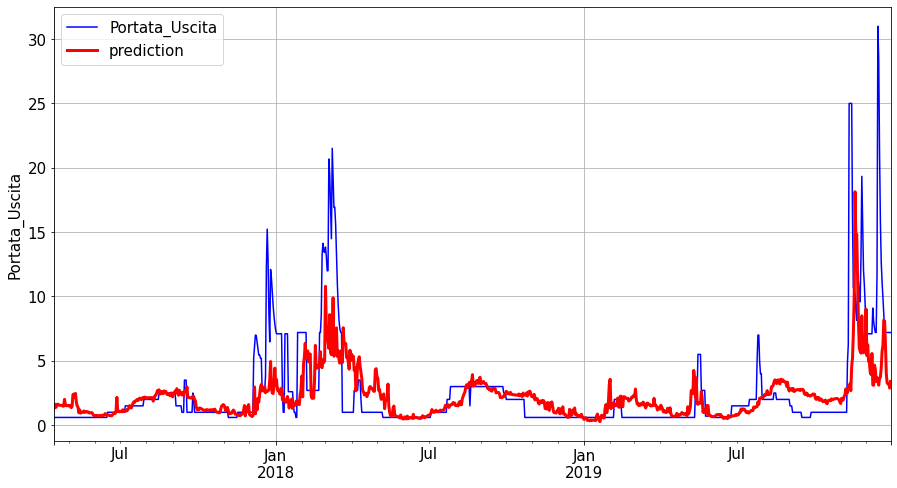

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test_final.columns = ['Portata_Uscita', 'prediction']
ax = y_test_final['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error(prediction,y_test_final.Portata_Uscita)

11.949589093710246

## 7) Testing of XGBoost con Feature Selection (Tentativo 2)

In [ ]:
X_test_final = test_PU_SL[['Pioggia_Zona_2', 'Pioggia_Zona_4', 'Temperatura_Zona_5',
       'Temperatura_Trend_shifted', 'Temperatura_Season_shifted',
       'year_sin_shifted', 'year_cos_shifted', 'Livello_Acqua_shifted',
       'Livello_Acqua']]

y_test_final = test_PU_SL['Target']

In [ ]:
xgb = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/XGB_model_featsel_PU_T2.sav', 'rb'))

In [ ]:
prediction = xgb.predict(X_test_final)

In [ ]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

In [ ]:
y_test_final['Target'] = (np.exp(y_test_final.Target-1)-1)
y_test_final['prediction'] = (np.exp(y_test_final.prediction-1)-1)

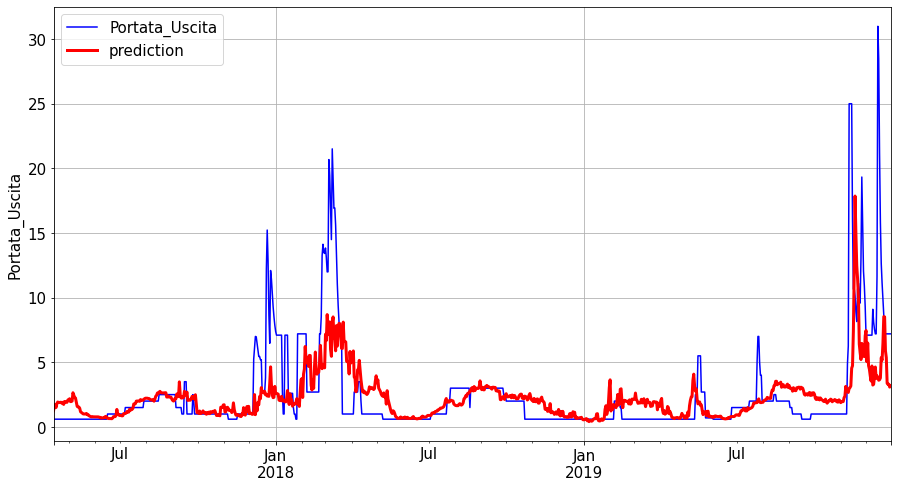

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test_final.columns = ['Portata_Uscita', 'prediction']
ax = y_test_final['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( prediction,y_test_final.Portata_Uscita)

11.97080351797098

## 8) Testing of Random Forest (Tentativo 2)

In [ ]:
test_PU_SL = pd.read_csv('/content/gdrive/MyDrive/Progetto_industry/Data/Prepared/test_PU_SL_T2.csv')
test_PU_SL['Data'] = pd.to_datetime(test_PU_SL['Data'], format="%Y-%m-%d")
test_PU_SL.set_index('Data', inplace=True)
X_test = test_PU_SL.drop(['Target'],axis=1)
y_test = test_PU_SL['Target']

In [ ]:
rf = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/RF_model_PU_T2.sav', 'rb'))

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['prediction'] = prediction

In [ ]:
y_test['Target'] = (np.exp(y_test.Target-1)-1)
y_test['prediction'] = (np.exp(y_test.prediction-1)-1)

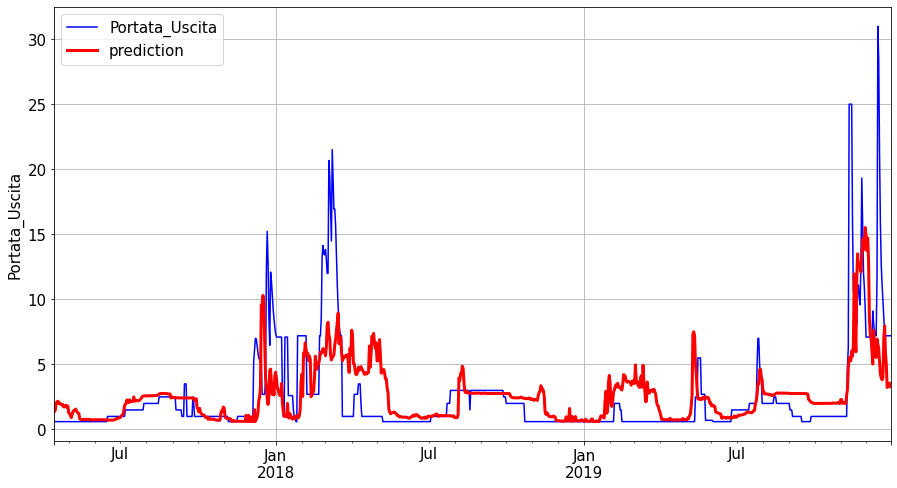

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test.columns = ['Portata_Uscita', 'prediction']
ax = y_test['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( y_test.Portata_Uscita,prediction)

11.79334291003502

## 9) Testing of Random Forest con Feature Selection (Tentativo 2)

In [ ]:
X_test = test_PU_SL[['Temperatura_Trend_shifted', 'year_cos_shifted',
       'Livello_Acqua_shifted', 'Livello_Acqua']]
y_test = test_PU_SL['Target']

In [ ]:
rf = pickle.load(open('/content/gdrive/MyDrive/Progetto_industry/Models/RF_model_featsel_PU_T2.sav', 'rb'))

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['prediction'] = prediction

In [ ]:
y_test['Target'] = (np.exp(y_test.Target-1)-1)
y_test['prediction'] = (np.exp(y_test.prediction-1)-1)

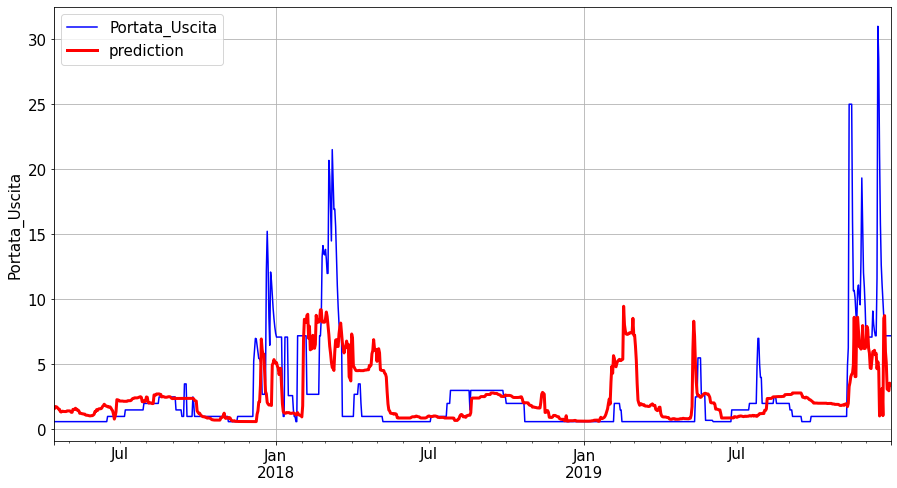

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test.columns = ['Portata_Uscita', 'prediction']
ax = y_test['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
mean_squared_error( y_test.Portata_Uscita,prediction)

12.208573056379173